In [5]:
import flopy
import numpy as np

Model Settings

In [10]:
model_name = "saturated_model"
model = flopy.modflow.Modflow(modelname=model_name, exe_name=r"C:\MODFLOW\MF2005.1_12\bin\mf2005.exe")

nrow, ncol = 20, 20
delr = delc = 100 # Grid spacing
top = 10
botm = 0

# DIS Package (grid)
dis = flopy.modflow.ModflowDis(model, nlay=1, nrow=nrow, ncol=ncol,
                               delr=delr, delc=delc, top=top, botm=botm)

# IBOUND and starting head
ibound = np.ones((1, nrow, ncol), dtype=int)
ibound[:, :, 0] = -1  # fixed head left
ibound[:, :, -1] = -1  # fixed head right

strt = 10.0  # starting head everywhere
bas = flopy.modflow.ModflowBas(model, ibound=ibound, strt=strt)

# Hydraulic conductivity (uniform)
lpf = flopy.modflow.ModflowLpf(model, hk=10.0)

# Recharge package
rch = flopy.modflow.ModflowRch(model, rech=0.001)

# Solver & Output
pcg = flopy.modflow.ModflowPcg(model)
oc = flopy.modflow.ModflowOc(model)

# Write input and run
model.write_input()
success, buff = model.run_model()

FloPy is using the following executable to run the model: ..\MODFLOW\MF2005.1_12\bin\mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: saturated_model.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2025/08/05 22:08:25

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2025/08/05 22:08:25
 Elapsed run time:  0.076 Seconds

  Normal termination of simulation


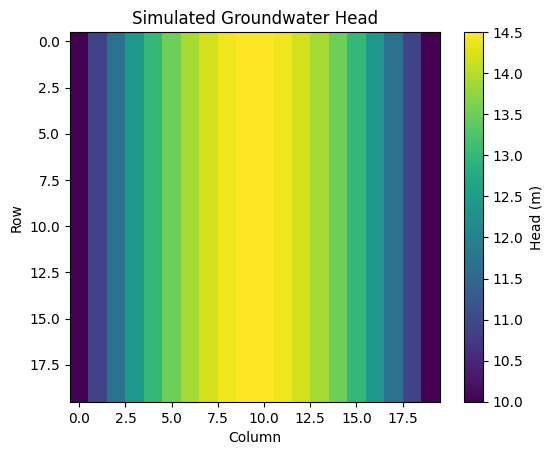

In [12]:
import matplotlib.pyplot as plt
import flopy.utils.binaryfile as bf

# Load the head file
headobj = bf.HeadFile("saturated_model.hds")
times = headobj.get_times()
head = headobj.get_data(totim=times[-1])  # get last time step

# Plot the water table
plt.imshow(head[0], cmap="viridis", origin="upper")
plt.colorbar(label="Head (m)")
plt.title("Simulated Groundwater Head")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()
